### Finiding the similaity between movies

we are gonna find the similarities between the movies using the movie plot. The given datasets has `wiki_plot` and `imdb_plot`, which we will be using to find the plot

#### Step 1: Importing the csv and analysing the data


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('csv/movies.csv')

In [3]:
df.head(5)

,rank,title,genre,wiki_plot,imdb_plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1..."


In [4]:
df.isnull().sum()

rank          0
title         0
genre         0
wiki_plot     0
imdb_plot    10
dtype: int64

#### Step 2: Filling out the missing values

Lets fill out the missing values. Since, the missing data's are of text type, we will fill with the empty string

In [5]:
df[df['imdb_plot'].isnull()]

,rank,title,genre,wiki_plot,imdb_plot
56,56,High Noon,[u' Western'],"Will Kane (Gary Cooper), the longtime marshal ...",NaN
62,62,All Quiet on the Western Front,"[u' Drama', u' War']",\n\n\n\n\nThis section's plot summary may be t...,NaN
64,64,City Lights,"[u' Comedy', u' Drama', u' Romance']",Bissinger followed the team for the entire 198...,NaN
74,74,Terms of Endearment,"[u' Comedy', u' Drama']",Aurora Greenway (Shirley MacLaine) and her dau...,NaN
79,79,Shane,"[u' Drama', u' Romance', u' Western']",\n\n\n\nAlan Ladd and Jean Arthur\n\n \n \n\...,NaN
82,82,Network,[u' Drama'],"Howard Beale, the longtime anchor of the Union...",NaN
88,88,Stagecoach,"[u' Adventure', u' Western']","In 1880, a motley group of strangers boards th...",NaN
89,89,Mutiny on the Bounty,"[u' Adventure', u' Drama', u' History']","In the year 1787, the Bounty sets sail from En...",NaN
93,93,Wuthering Heights,"[u' Drama', u' Romance']",A traveller named Lockwood (Miles Mander) is c...,NaN
99,99,Yankee Doodle Dandy,"[u' Biography', u' Drama', u' Musical']","\n In the early days of World War II, Cohan ...",NaN


In [6]:
df = df.fillna('')

In [7]:
df.isnull().sum()

rank         0
title        0
genre        0
wiki_plot    0
imdb_plot    0
dtype: int64

#### Step 3: Pre processing the data

Lets combine wiki_polt and imdb_plot in to a single column

In [8]:
df['plots'] = df['wiki_plot'] + df['imdb_plot']

In [9]:
df.head(5)

,rank,title,genre,wiki_plot,imdb_plot,plots
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","On the day of his only daughter's wedding, Vit..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","In 1947, banker Andy Dufresne is convicted of ..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"In 1939, the Germans move Polish Jews into the..."
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","In a brief scene in 1964, an aging, overweight..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...",It is early December 1941. American expatriate...


In [10]:
df.isnull().sum()

rank         0
title        0
genre        0
wiki_plot    0
imdb_plot    0
plots        0
dtype: int64

#### Step 4: Toekinzing and stemming the text

We cannot feed the text in to machine learning model, we want to use nltk package to tokenize the plot.

We will be also using stemming and Tfidf vectoirzer.

##### Stemming
Consider the sentence from the plot of <em>The Godfather</em>: "Today (May 19, 2016) is his only daughter's wedding." If we do a 'tokenize-only' for this sentence, we have the following result:</p>
<blockquote>
  <p>'today', 'may', 'is', 'his', 'only', 'daughter', "'s", 'wedding'</p>
</blockquote>
<p>But when we do a 'tokenize-and-stem' operation we get:</p>
<blockquote>
  <p>'today', 'may', 'is', 'his', 'onli', 'daughter', "'s", 'wed'</p>
</blockquote>
<p>All the words are in their root form, which will lead to a better establishment of meaning as some of the non-root forms may not be present in the NLTK training corpus.</p>

In [11]:
import re
import nltk
from nltk.stem.snowball import SnowballStemmer

In [12]:
custom_text = 'This is my first machine learning project, where I am using nltk. I hope this project gives me knowledge in nltk'

Sentence tokenizer, sent_tokenize, used to tokenize each sentences.

In [13]:
sent = [sent for sent in nltk.sent_tokenize(custom_text)]
sent

['This is my first machine learning project, where I am using nltk.',
 'I hope this project gives me knowledge in nltk']

Word tokenizer, word_tokenize, used to tokenize each word in the sentences.

In [14]:
filtered = [word for word in nltk.word_tokenize(sent[0]) if re.search(r"[a-zA-Z]", word)]
filtered

['This',
 'is',
 'my',
 'first',
 'machine',
 'learning',
 'project',
 'where',
 'I',
 'am',
 'using',
 'nltk']

In [15]:
stemmer = SnowballStemmer('english')

In [16]:
stemmed_word = [stemmer.stem(word) for word in filtered]
stemmed_word

['this',
 'is',
 'my',
 'first',
 'machin',
 'learn',
 'project',
 'where',
 'i',
 'am',
 'use',
 'nltk']

Lets make use of concept for the whole dataset. We will define the function for that purpose and pass the text as an argument.

In [17]:
# Define a function to perform both stemming and tokenization
def tokenize_and_stem(text):
    
    # Tokenize by sentence, then by word
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    
    # Filter out raw tokens to remove noise
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]
    
    # Stem the ltered_tokens
    stems = [stemmer.stem(token) for token in filtered_tokens]
    
    return stems

words_stemmed = tokenize_and_stem("Today (May 19, 2016) is his only daughter's wedding.")
print(words_stemmed)

['today', 'may', 'is', 'his', 'onli', 'daughter', "'s", 'wed']


#### Step 5: Tfidf Vectorizing the datasets

##### Term frequency - inverse document frequency 
The Term Frequency of a word is the measure of how often it appears in a document, while the Inverse Document Frequency is the parameter which reduces the importance of a word if it frequently appears in several documents.

Lets work it out for single custom made text and then we can implement it for the whole datasets

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem)

In [20]:
tfidf_matrix = tfidf_vectorizer.fit_transform([x for x in df["plots"]])
tfidf_matrix

/home/thananjaya/.local/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


<100x549 sparse matrix of type '<class 'numpy.float64'>'
	with 19556 stored elements in Compressed Sparse Row format>

In [21]:
tfidf_matrix.shape

(100, 549)

#### Step 6: Calculating similarity distance

<p>Consider the following two sentences from the movie <em>The Wizard of Oz</em>: </p>
<blockquote>
  <p>"they find in the Emerald City"</p>
  <p>"they finally reach the Emerald City"</p>
</blockquote>
<p>If we put the above sentences in a <code>CountVectorizer</code>, the vocabulary produced would be "they, find, in, the, Emerald, City, finally, reach" and the vectors for each sentence would be as follows: </p>
<blockquote>
  <p>1, 1, 1, 1, 1, 1, 0, 0</p>
  <p>1, 0, 0, 1, 1, 1, 1, 1</p>
</blockquote>
<p>When we calculate the cosine angle formed between the vectors represented by the above, we get a score of 0.667. This means the above sentences are very closely related. <em>Similarity distance</em> is 1 - <a href="https://en.wikipedia.org/wiki/Cosine_similarity">cosine similarity angle</a>. This follows from that if the vectors are similar, the cosine of their angle would be 1 and hence, the distance between then would be 1 - 1 = 0.</p>
<p>Let's calculate the similarity distance for all of our movies.</p>

In [22]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the similarity distance
similarity_distance = 1 - cosine_similarity(tfidf_matrix)

##### Step 7: Visualizing  the similarities using dendrogram

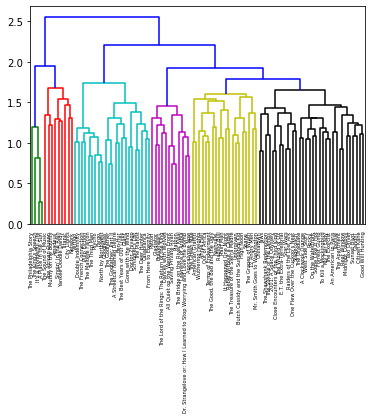

<Figure size 7200x7200 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(similarity_distance, method='complete')

# Plot the dendrogram, using title as label column
dendrogram_ = dendrogram(mergings,
               labels=[x for x in df["title"]]
)
plt.figure(figsize=(100, 100))

plt.show()